Note: you may need to restart the kernel to use updated packages.
Dataset Overview:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0

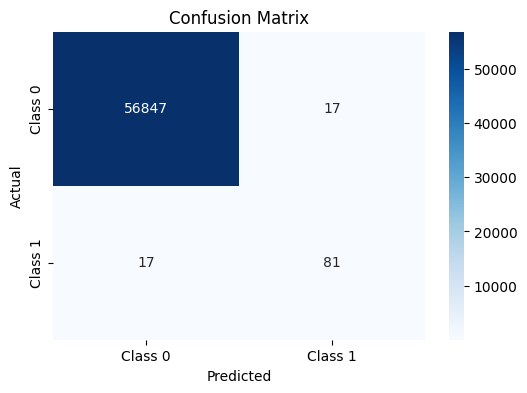

accuracy score: 0.999403110845827
f1 score: 0.826530612244898


In [ ]:

%pip install imbalanced-learn


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For train-test splitting
from sklearn.model_selection import train_test_split

# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import classification_report, confusion_matrix

# Handling class imbalance
from imblearn.over_sampling import SMOTE

import pandas as pd
df=pd.read_csv('creditcard.csv')

# Display dataset info
print("Dataset Overview:")
print(df.head())

# Define feature columns and target column
target_column = 'Class'  
X = df.drop(columns=[target_column])  # Features
y = df[target_column]  # Target

# Check class distribution
print("\nClass distribution before balancing:")
print(y.value_counts())

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred = rf_model.predict(X_test)

# Model evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

from sklearn.metrics import f1_score,accuracy_score
print("accuracy score:",accuracy_score(y_test,y_pred))
print("f1 score:",f1_score(y_test,y_pred))
